In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
df_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

# QUESTION
1. Which country is the happiest in the world?
2. What are the most important contributing factors to a nation’s happiness?
3. Is overall happiness increasing or decreasing?

For the first and second question, I only focused at the newest dataset, which is in year 2019. For the third question, I took from the data from year 2015-2019.

# 1.Which country is the happiest in the world?

In [4]:
#DATA UNDERSRANDING
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
df_2019.sort_values(by='Score', ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Conclusion: 
The happiest country in the world is Finland

# 2. The most contributing factor to world happiness

In [7]:
df_2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [8]:
df_2019.corr()[['Score']].sort_values(by=['Score'], ascending=False)

,Score
Score,1.000000
GDP per capita,0.793883
Healthy life expectancy,0.779883
Social support,0.777058
Freedom to make life choices,0.566742
Perceptions of corruption,0.385613
Generosity,0.075824
Overall rank,-0.989096


Conclusion: The most contributing factor is GDP per capita

# 3.Is overall happiness increasing or decreasing?
To answer this question, I will compare the Score from 2015 - 2019

In [9]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
scoresummary = df_2015.describe()[['Happiness Score']]
scoresummary

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


In [11]:
#change the column name from 'Happiness Score' to '2015'
scoresummary['2015'] = df_2015.describe()[['Happiness Score']]
scoresummary.drop(columns=['Happiness Score'],axis=1, inplace=True)
scoresummary

,2015
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


In [12]:
#Adding happiness score from 2016-2017 to the scoresummary table
scoresummary['2016'] = df_2016.describe()[['Happiness Score']]
scoresummary.head()

,2015,2016
count,158.000000,157.000000
mean,5.375734,5.382185
std,1.145010,1.141674
min,2.839000,2.905000
25%,4.526000,4.404000


In [13]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [14]:
scoresummary['2017'] = df_2017.describe()[['Happiness.Score']]

In [15]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [16]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [17]:
scoresummary['2018'] = df_2018.describe()[['Score']]

In [18]:
scoresummary['2019'] = df_2019.describe()[['Score']]

In [19]:
scoresummary

,2015,2016,2017,2018,2019
count,158.000000,157.000000,155.000000,156.000000,156.000000
mean,5.375734,5.382185,5.354019,5.375917,5.407096
std,1.145010,1.141674,1.131230,1.119506,1.113120
min,2.839000,2.905000,2.693000,2.905000,2.853000
25%,4.526000,4.404000,4.505500,4.453750,4.544500
50%,5.232500,5.314000,5.279000,5.378000,5.379500
75%,6.243750,6.269000,6.101500,6.168500,6.184500
max,7.587000,7.526000,7.537000,7.632000,7.769000


In [20]:
scoresummary.drop('std', inplace=True)

In [21]:
scores = scoresummary.transpose()
scores

,count,mean,min,25%,50%,75%,max
2015,158.0,5.375734,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,2.853,4.54450,5.3795,6.18450,7.769


<AxesSubplot:>

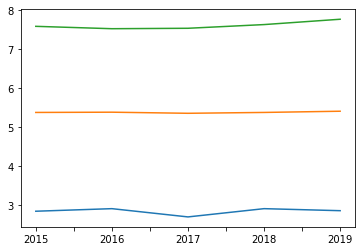

In [22]:
scores['min'].plot()
scores['mean'].plot()
scores['max'].plot()

Conclusion: Happiness index is decreasing from 2015-2017, but increase again after 2017